In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ksdensity(data, width=0.3):
    """Returns kernel smoothing function from data points in data"""
    def ksd(x_axis): # normal pdf
        def n_pdf(x, mu=0., sigma=1.):
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd


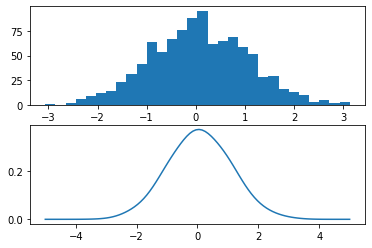

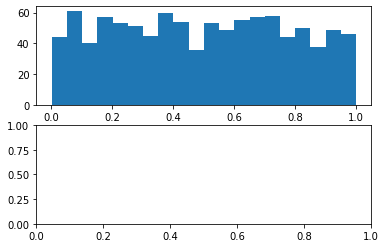

In [2]:
# Plot normal distribution
fig, ax = plt.subplots(2)
x = np.random.randn(1000)
ax[0].hist(x, bins=30) # number of bins
ax[0].plot()
ks_density = ksdensity(x, width=0.4)
# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 100)
ax[1].plot(x_values, ks_density(x_values))

# Plot uniform distribution
fig2, ax2 = plt.subplots(2)
x = np.random.rand(1000)
ax2[0].hist(x, bins=20)
ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
plt.show()
ax2[1].plot(x_values, ks_density(x_values))
plt.show()

There is a clear advantage to using the kernel density function as it is smoothed into a continuous function that can better be intepreted when comparing to a continuous normal disribution. 

In [67]:
#Finding the theoretical mean and standard deviation from uniform distribution histogram data
samples =10000
n = np.random.rand(samples)

bins = []
bin_number = 30
for i in range(bin_number):
    interval = 1/bin_number
    temp_list =[]
    for nj in n:
        if (interval*(i)) < nj < (interval*(i+1)):
            temp_list.append(nj)
    bins.append(temp_list)

#probabilities
def get_probs(bins):
    bin_probs=[]
    for x in range(len(bins)):
        bins_num = len(bins[x])
        bin_probs.append(bins_num/samples)
    return(bin_probs)
print(get_probs(bins))

#means
def bin_mean(bins,j):
    return samples*get_probs(bins)[j]

#standard deviations
def bin_sd(bins,j):
    return np.sqrt(samples*get_probs(bins)[j]*(1-get_probs(bins)[j]))
print('theoretical mean is ' + str(samples*(1/bin_number)) + ". Calulated mean is " +str(bin_mean(bins,2)) + " for N =" + str(samples))
print('theoretical sd is ' + str(np.sqrt(samples*(1/bin_number)*(1-1/bin_number))) + ". Calulated sd is " +str(bin_sd(bins,2)) + " for N =" + str(samples))


[0.0332, 0.0334, 0.0308, 0.0309, 0.0324, 0.0332, 0.0335, 0.0347, 0.0294, 0.0342, 0.0317, 0.0329, 0.0336, 0.0344, 0.0346, 0.0324, 0.0329, 0.035, 0.0326, 0.0347, 0.0342, 0.0342, 0.0329, 0.0364, 0.0307, 0.0349, 0.0368, 0.0297, 0.0342, 0.0355]
theoretical mean is 333.3333333333333. Calulated mean is 308.0 for N =10000
theoretical sd is 17.950549357115012. Calulated sd is 17.27754612206259 for N =10000


As N increases we see the probabilities, mean and sd start tending towards the true uniform distribution.
Therefore the histogram results are consistent with the multinomial distribution theory.